In [ ]:
# default_exp eval.mining.ir.unsupervised.x2v

# Evaluation Methods for Software Information Retrieval 

> This module is dedicated to evaluate word2vec/doc2vec or any neural unsupervised approaches on traceability datasets.
> Implementing mutual information analysis
> Author: @danaderp Dec 2020

Software Retrieval can be analyzed in two ways: supervised and unsupervised. 

We employ metrics based on accuracy to evaluate supervised software retrieval:
 - Precision Recall Gain
 - Precision Recall
 - ROC curve
 
We rely on information theory and manifold analysis to evaluate software retrieval unsupervised:
- Information Theory for Software Information Retrieval (Shared Information and Mutual Information)
- Prototypes and Criticisms for Paragraph Vectors 

Check out this methods for causality [links](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6074945/#:~:text=G%20methods%20include%20inverse%20probability,assumptions%20than%20standard%20regression%20methods)

In [ ]:
from prg import prg

In [ ]:
import ds4se as ds
from ds4se.mining.ir import VectorizationType
from ds4se.mining.ir import SimilarityMetric
from ds4se.mining.ir import EntropyMetric

In [ ]:
import numpy as np

In [ ]:
#??
import gensim
import pandas as pd
from itertools import product 
from random import sample 
import functools 
import os
from enum import Enum, unique, auto

In [ ]:
#export
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import lag_plot
import math as m
import random as r
import collections
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html
#export
from scipy.spatial import distance
from scipy.stats import pearsonr
import scipy as sc

In [ ]:
#export
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Loading Experiments

In [ ]:
#baseline experiment
experiment = 'experiments0.0.x/'
path_data = '../dvc-ds4se/metrics/traceability/' + experiment 
def libest_params():
    return{
        "experiment_path_w2v": path_data + '[libest-VectorizationType.word2vec-LinkType.req2tc-True-1608690009.09251].csv',
        "experiment_path_d2v": path_data + '[libest-VectorizationType.doc2vec-LinkType.req2tc-True-1608686014.751808].csv'
    }   

In [ ]:
###########

In [ ]:
#experiment 0.0.0/1
experiment = 'experiments0.0.x/'
path_data = '../dvc-ds4se/metrics/traceability/' + experiment 
def libest_params():
    return{
        "system": 'libest',
        "experiment_path_w2v": path_data + '[libest-VectorizationType.word2vec-LinkType.req2tc-True-1609292406.653621].csv',
        "experiment_path_d2v": path_data + '[libest-VectorizationType.doc2vec-LinkType.req2tc-True-1609289141.142806].csv'
    }   

In [ ]:
#experiment 0.0.2/3
experiment = 'experiments0.0.x/'
path_data = '../dvc-ds4se/metrics/traceability/' + experiment 
def sacp_params():
    return{
        "system": 'sacp',
        "experiment_path_w2v": path_data + '[sacp-python-common-VectorizationType.word2vec-LinkType.issue2src-True-1608725764.813377].csv',
        "experiment_path_d2v": path_data + '[sacp-python-common-VectorizationType.doc2vec-LinkType.issue2src-True-1608688791.757431].csv',
        'saving_path': '../../'+'data/cisco/sacp_data/',
        'system_long': 'sacp-python-common',
        'timestamp': 1595953540.866044,
        'language': 'all-corpus'
    }  

In [ ]:
#params = libest_params()
params = sacp_params()

params['experiment_path_w2v']

'../dvc-ds4se/metrics/traceability/experiments0.0.x/[sacp-python-common-VectorizationType.word2vec-LinkType.issue2src-True-1608725764.813377].csv'

In [ ]:
#experiment 1.0.0/1
experiment = 'experiments1.0.x/'
path_data = '../dvc-ds4se/metrics/traceability/' + experiment 
def libest_params():
    return{
        "experiment_path_w2v": path_data + '[libest-VectorizationType.word2vec-LinkType.req2tc-True-1608759050.647883].csv',
        "experiment_path_d2v": path_data + '[libest-VectorizationType.doc2vec-LinkType.req2tc-True-1608690752.27334].csv'
    }   

In [ ]:
#experiment 1.0.2/3
experiment = 'experiments1.0.x/'
path_data = '../dvc-ds4se/metrics/traceability/' + experiment 
def sacp_params():
    return{
        "experiment_path_w2v": path_data + '[sacp-python-common-VectorizationType.word2vec-LinkType.issue2src-True-1609287807.786373].csv',
        "experiment_path_d2v": path_data + '[sacp-python-common-VectorizationType.doc2vec-LinkType.issue2src-True-1609009631.599384].csv'
    }   

#  Data Science Evaluation
Classification/evaluation metrics for highly imbalanced data [(see Forum)](https://stats.stackexchange.com/questions/222558/classification-evaluation-metrics-for-highly-imbalanced-data).

In [ ]:
%matplotlib inline

In [ ]:
#export
class VectorEvaluation():
    '''Approaches Common Evaluations and Interpretations (statistical analysis)
       Loading unsupervised results
       w2v includes entropy evaluation
    '''
    def __init__(self, params):
        self.params = params
        self.df_w2v = pd.read_csv(params['experiment_path_w2v'], header=0, index_col=0, sep=' ')
        self.df_d2v = pd.read_csv(params['experiment_path_d2v'], header=0, index_col=0, sep=' ')
        
        self.sim_list_w2v = [SimilarityMetric.SCM_sim, SimilarityMetric.WMD_sim]
        self.sim_list_d2v = [SimilarityMetric.COS_sim , SimilarityMetric.EUC_sim]
        
        
        
        #Entropy
        manifoldEntropy =  self.sim_list_w2v + [EntropyMetric.Entropy_src, EntropyMetric.Entropy_tgt, 
                           EntropyMetric.JI, EntropyMetric.MI, EntropyMetric.Loss, 
                           EntropyMetric.Noise]
        manifoldEntropy = [str(i) for i in manifoldEntropy] + ['Linked?']
        self.manifoldEntropy = self.df_w2v[manifoldEntropy].copy()

        ##Concat D2V
        for i in self.sim_list_d2v:
            self.manifoldEntropy[ str(i) ] = self.df_d2v[str(i)].values
        
        self.manifoldEntropy = self.manifoldEntropy[~self.manifoldEntropy.isin([np.nan, np.inf, -np.inf]).any(1)]
        
        #SharedInfo
        sharedInfo = self.sim_list_w2v +[EntropyMetric.MSI_I,EntropyMetric.MSI_X]
        sharedInfo = [str(i) for i in sharedInfo] + ['Linked?']
        self.sharedInfo = self.df_w2v[sharedInfo].copy()
        
        for i in self.sim_list_d2v:
            self.sharedInfo[ str(i) ] = self.df_d2v[ str(i) ].values #No filtered by nans
            
        self.df_sys = self.LoadCorpus(params['timestamp'], language=params['language'], sep='~')
            
    def LoadCorpus(self, timestamp, language='js', sep=',', mode='a'):
        path_to_link = self.params['saving_path'] + '['+ self.params['system_long']  + '-' + language + '-{}].csv'.format(timestamp)
        return pd.read_csv(path_to_link, header=0, index_col=0, sep=sep)

In [ ]:
#tst
test_vector_eval = VectorEvaluation(params)

In [ ]:
#tst
test_vector_eval.df_w2v.shape

(21312, 15)

In [ ]:
#tst 
test_vector_eval.df_d2v.shape

(21312, 10)

In [ ]:
assert test_vector_eval.df_w2v.Source[0] == test_vector_eval.df_d2v.Source[0]

In [ ]:
assert test_vector_eval.df_w2v.Target[0] == test_vector_eval.df_d2v.Target[0]

In [ ]:
assert test_vector_eval.df_w2v.Source[1091] == test_vector_eval.df_d2v.Source[1091]

In [ ]:
assert test_vector_eval.df_w2v.Target[1091] == test_vector_eval.df_d2v.Target[1091]

In [ ]:
#tst
test_vector_eval.manifoldEntropy

SimilarityMetric.SCM_sim  SimilarityMetric.WMD_sim  \
0                      0.110376                  0.449200   
1                      0.140212                  0.449817   
2                      0.085187                  0.450480   
3                      0.124534                  0.460546   
4                      0.116591                  0.462755   
...                         ...                       ...   
21307                  0.154716                  0.464917   
21308                  0.249533                  0.479714   
21309                  0.365730                  0.501376   
21310                  0.211716                  0.473408   
21311                  0.218099                  0.467194   

       EntropyMetric.Entropy_src  EntropyMetric.Entropy_tgt  EntropyMetric.JI  \
0                        3.70044                   6.301552          6.400817   
1                        3.70044                   6.739006          6.805642   
2                        3.70044                   5.870833          5.958213   
3                        3.70044                   5.371881          5.572607   
4                        3.70044                   4.851083          5.140316   
...                          ...                        ...               ...   
21307                    3.70044                   5.015423          5.220713   
21308                    3.70044                   6.030001          6.106124   
21309                    3.70044                   5.953709          6.020756   
21310                    3.70044                   6.184756          6.276792   
21311                    3.70044                   6.212221          6.281892   

       EntropyMetric.MI  EntropyMetric.Loss  EntropyMetric.Noise  Linked?  \
0              3.601175            2.700378             0.099265      0.0   
1              3.633803            3.105203             0.066637      0.0   
2              3.613060            2.257774             0.087380      1.0   
3              3.499714            1.872167             0.200726      0.0   
4              3.411206            1.439877             0.289233      0.0   
...                 ...                 ...                  ...      ...   
21307          3.495149            1.520273             0.205291      0.0   
21308          3.624317            2.405684             0.076122      0.0   
21309          3.633393            2.320316             0.067047      0.0   
21310          3.608404            2.576353             0.092036      0.0   
21311          3.630769            2.581452             0.069671      0.0   

       SimilarityMetric.COS_sim  SimilarityMetric.EUC_sim  
0                      0.100827                  0.024248  
1                      0.004866                  0.017128  
2                      0.007996                  0.017752  
3                      0.005643                  0.023164  
4                      0.051069                  0.023401  
...                         ...                       ...  
21307                  0.086599                  0.024458  
21308                  0.100665                  0.018564  
21309                  0.309972                  0.020122  
21310                  0.180529                  0.020752  
21311                  0.138348                  0.016286  

[21312 rows x 11 columns]

In [ ]:
#tst
test_vector_eval.sharedInfo

SimilarityMetric.SCM_sim  SimilarityMetric.WMD_sim  \
0                      0.110376                  0.449200   
1                      0.140212                  0.449817   
2                      0.085187                  0.450480   
3                      0.124534                  0.460546   
4                      0.116591                  0.462755   
...                         ...                       ...   
21307                  0.154716                  0.464917   
21308                  0.249533                  0.479714   
21309                  0.365730                  0.501376   
21310                  0.211716                  0.473408   
21311                  0.218099                  0.467194   

       EntropyMetric.MSI_I  EntropyMetric.MSI_X  Linked?  \
0                 1.584963             1.169925      0.0   
1                 1.584963             1.169925      0.0   
2                 1.000000             1.000000      1.0   
3                 1.000000             1.000000      0.0   
4                 1.000000             1.000000      0.0   
...                    ...                  ...      ...   
21307             1.000000             1.000000      0.0   
21308             2.321928             1.287712      0.0   
21309             2.807355             1.334355      0.0   
21310             1.584963             1.169925      0.0   
21311             2.321928             1.287712      0.0   

       SimilarityMetric.COS_sim  SimilarityMetric.EUC_sim  
0                      0.100827                  0.024248  
1                      0.004866                  0.017128  
2                      0.007996                  0.017752  
3                      0.005643                  0.023164  
4                      0.051069                  0.023401  
...                         ...                       ...  
21307                  0.086599                  0.024458  
21308                  0.100665                  0.018564  
21309                  0.309972                  0.020122  
21310                  0.180529                  0.020752  
21311                  0.138348                  0.016286  

[21312 rows x 7 columns]

In [ ]:
#Sys
test_vector_eval.df_sys.head(2)

ids                                               text type  \
0  295  Production Merge * Feed release name through t...   pr   
1  294  Add test fields for DARE push * Added test dat...   pr   

                                                conv  
0  product merg feed releas name upload bom allow...  
1  add test field dare push test data json sent d...

## EDA for Interpretability

In [ ]:
## Confidence Intervals Self-Information
#TODO add in to a class
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sc.stats.sem(a)
    h = se * sc.stats.t.ppf((1 + confidence) / 2., n-1)
    return round(m,2), round(m-h,2), round(m+h,2), round(h,2)

In [ ]:
#Source self Entropy
mean_confidence_interval(test_vector_eval.manifoldEntropy['EntropyMetric.Entropy_src'].values)

(3.42, 3.4, 3.44, 0.02)

In [ ]:
#Target Self Entropy
mean_confidence_interval(test_vector_eval.manifoldEntropy['EntropyMetric.Entropy_tgt'].values)

(5.91, 5.9, 5.92, 0.01)

In [ ]:
#Mutual information
mean_confidence_interval(test_vector_eval.manifoldEntropy['EntropyMetric.MI'].values)

(3.21, 3.19, 3.23, 0.02)

In [ ]:
#Loss
mean_confidence_interval(test_vector_eval.manifoldEntropy['EntropyMetric.Loss'].values)

(2.7, 2.68, 2.72, 0.02)

In [ ]:
#Noise
mean_confidence_interval(test_vector_eval.manifoldEntropy['EntropyMetric.Noise'].values)

(0.21, 0.21, 0.22, 0.0)

In [ ]:
#export
class ExploratoryDataSoftwareAnalysis(VectorEvaluation):
    def __init__(self, params):
        super().__init__(params)

In [ ]:
EDA = ExploratoryDataSoftwareAnalysis( params = params ) #<---- Parameter 

In [ ]:
EDA.df_w2v.describe().round(2)

Source  DistanceMetric.WMD  SimilarityMetric.WMD_sim  \
count  21312.00            21312.00                  21312.00   
mean     147.25                 inf                      0.45   
std       85.64                 NaN                      0.06   
min        1.00                0.84                      0.00   
25%       72.75                1.17                      0.44   
50%      145.50                1.22                      0.45   
75%      221.25                1.27                      0.46   
max      295.00                 inf                      0.54   

       DistanceMetric.SCM  SimilarityMetric.SCM_sim  EntropyMetric.MSI_I  \
count            21312.00                  21312.00             15895.00   
mean                 0.90                      0.10                 1.45   
std                  0.09                      0.09                 1.14   
min                  0.39                      0.00                 0.00   
25%                  0.85                      0.04                 0.00   
50%                  0.92                      0.08                 1.50   
75%                  0.96                      0.15                 2.32   
max                  1.00                      0.61                 5.30   

       EntropyMetric.MSI_X  EntropyMetric.Entropy_src  \
count             15895.00                   21312.00   
mean                  0.87                       3.42   
std                   0.54                       1.31   
min                   0.00                       0.00   
25%                   0.00                       2.32   
50%                   1.12                       3.65   
75%                   1.27                       4.36   
max                   1.42                       6.56   

       EntropyMetric.Entropy_tgt  EntropyMetric.JI  EntropyMetric.MI  \
count                   21312.00          21312.00          21312.00   
mean                        5.91              6.13              3.21   
std                         0.86              0.71              1.19   
min                         2.52              2.75             -0.23   
25%                         5.37              5.70              2.29   
50%                         5.90              6.09              3.40   
75%                         6.52              6.60              4.10   
max                         7.50              7.82              6.38   

       EntropyMetric.Loss  EntropyMetric.Noise   Linked?  
count            21312.00             21312.00  21312.00  
mean                 2.70                 0.21      0.03  
std                  1.35                 0.30      0.16  
min                 -0.01                -0.44      0.00  
25%                  1.68                 0.04      0.00  
50%                  2.53                 0.11      0.00  
75%                  3.58                 0.26      0.00  
max                  7.51                 4.12      1.00

In [ ]:
EDA.df_w2v[EDA.df_w2v['Linked?']== 1].describe().round(2)

Source  DistanceMetric.WMD  SimilarityMetric.WMD_sim  \
count  547.00              547.00                    547.00   
mean   217.55                 inf                      0.46   
std     46.22                 NaN                      0.05   
min     32.00                0.87                      0.00   
25%    202.00                1.13                      0.45   
50%    217.00                1.19                      0.46   
75%    245.50                1.24                      0.47   
max    295.00                 inf                      0.53   

       DistanceMetric.SCM  SimilarityMetric.SCM_sim  EntropyMetric.MSI_I  \
count              547.00                    547.00               479.00   
mean                 0.86                      0.14                 1.98   
std                  0.10                      0.10                 1.11   
min                  0.46                      0.00                 0.00   
25%                  0.81                      0.06                 1.50   
50%                  0.88                      0.12                 2.00   
75%                  0.94                      0.19                 2.71   
max                  1.00                      0.54                 5.23   

       EntropyMetric.MSI_X  EntropyMetric.Entropy_src  \
count               479.00                     547.00   
mean                  1.07                       3.80   
std                   0.43                       1.16   
min                   0.00                       0.00   
25%                   1.11                       3.38   
50%                   1.25                       4.12   
75%                   1.32                       4.35   
max                   1.42                       6.56   

       EntropyMetric.Entropy_tgt  EntropyMetric.JI  EntropyMetric.MI  \
count                     547.00            547.00            547.00   
mean                        6.23              6.42              3.60   
std                         0.89              0.72              1.06   
min                         2.52              4.30             -0.01   
25%                         5.77              5.94              3.29   
50%                         6.21              6.38              3.85   
75%                         7.13              7.14              4.18   
max                         7.50              7.66              6.38   

       EntropyMetric.Loss  EntropyMetric.Noise  Linked?  
count              547.00               547.00    547.0  
mean                 2.63                 0.20      1.0  
std                  1.33                 0.31      0.0  
min                 -0.01                -0.12      1.0  
25%                  1.66                 0.03      1.0  
50%                  2.46                 0.09      1.0  
75%                  3.32                 0.22      1.0  
max                  7.48                 2.76      1.0

In [ ]:
EDA.df_w2v[EDA.df_w2v['Linked?']== 0].describe().round(2)

Source  DistanceMetric.WMD  SimilarityMetric.WMD_sim  \
count  20765.00            20765.00                  20765.00   
mean     145.40                 inf                      0.45   
std       85.65                 NaN                      0.06   
min        1.00                0.84                      0.00   
25%       71.00                1.17                      0.44   
50%      142.00                1.22                      0.45   
75%      220.00                1.27                      0.46   
max      295.00                 inf                      0.54   

       DistanceMetric.SCM  SimilarityMetric.SCM_sim  EntropyMetric.MSI_I  \
count            20765.00                  20765.00             15416.00   
mean                 0.90                      0.10                 1.44   
std                  0.09                      0.09                 1.14   
min                  0.39                      0.00                 0.00   
25%                  0.85                      0.04                 0.00   
50%                  0.92                      0.08                 1.50   
75%                  0.96                      0.15                 2.25   
max                  1.00                      0.61                 5.30   

       EntropyMetric.MSI_X  EntropyMetric.Entropy_src  \
count             15416.00                   20765.00   
mean                  0.86                       3.41   
std                   0.54                       1.31   
min                   0.00                       0.00   
25%                   0.00                       2.32   
50%                   1.12                       3.64   
75%                   1.27                       4.39   
max                   1.42                       6.56   

       EntropyMetric.Entropy_tgt  EntropyMetric.JI  EntropyMetric.MI  \
count                   20765.00          20765.00          20765.00   
mean                        5.90              6.12              3.20   
std                         0.86              0.71              1.19   
min                         2.52              2.75             -0.23   
25%                         5.37              5.69              2.29   
50%                         5.90              6.08              3.39   
75%                         6.52              6.59              4.09   
max                         7.50              7.82              6.38   

       EntropyMetric.Loss  EntropyMetric.Noise  Linked?  
count            20765.00             20765.00  20765.0  
mean                 2.71                 0.21      0.0  
std                  1.35                 0.30      0.0  
min                 -0.01                -0.44      0.0  
25%                  1.68                 0.04      0.0  
50%                  2.53                 0.11      0.0  
75%                  3.59                 0.26      0.0  
max                  7.51                 4.12      0.0

In [ ]:
EDA.df_d2v.describe().round(2)

Source  DistanceMetric.EUC  SimilarityMetric.EUC_sim  \
count  21312.00            21312.00                  21312.00   
mean     147.25               49.03                      0.02   
std       85.64               15.24                      0.01   
min        1.00                4.04                      0.01   
25%       72.75               38.82                      0.02   
50%      145.50               49.51                      0.02   
75%      221.25               56.66                      0.03   
max      295.00              101.80                      0.20   

       DistanceMetric.COS  SimilarityMetric.COS_sim  DistanceMetric.MAN  \
count            21312.00                  21312.00            21312.00   
mean                 0.91                      0.09              874.50   
std                  0.07                      0.07              270.87   
min                  0.48                     -0.10               72.20   
25%                  0.87                      0.05              691.06   
50%                  0.92                      0.08              884.90   
75%                  0.95                      0.13             1014.73   
max                  1.10                      0.52             1823.68   

       SimilarityMetric.MAN_sim  SimilarityMetric.Pearson   Linked?  
count                  21312.00                  21312.00  21312.00  
mean                       0.00                      0.10      0.03  
std                        0.00                      0.07      0.16  
min                        0.00                      0.00      0.00  
25%                        0.00                      0.05      0.00  
50%                        0.00                      0.08      0.00  
75%                        0.00                      0.13      0.00  
max                        0.01                      0.52      1.00

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f621799c6a0>,
      dtype=object)

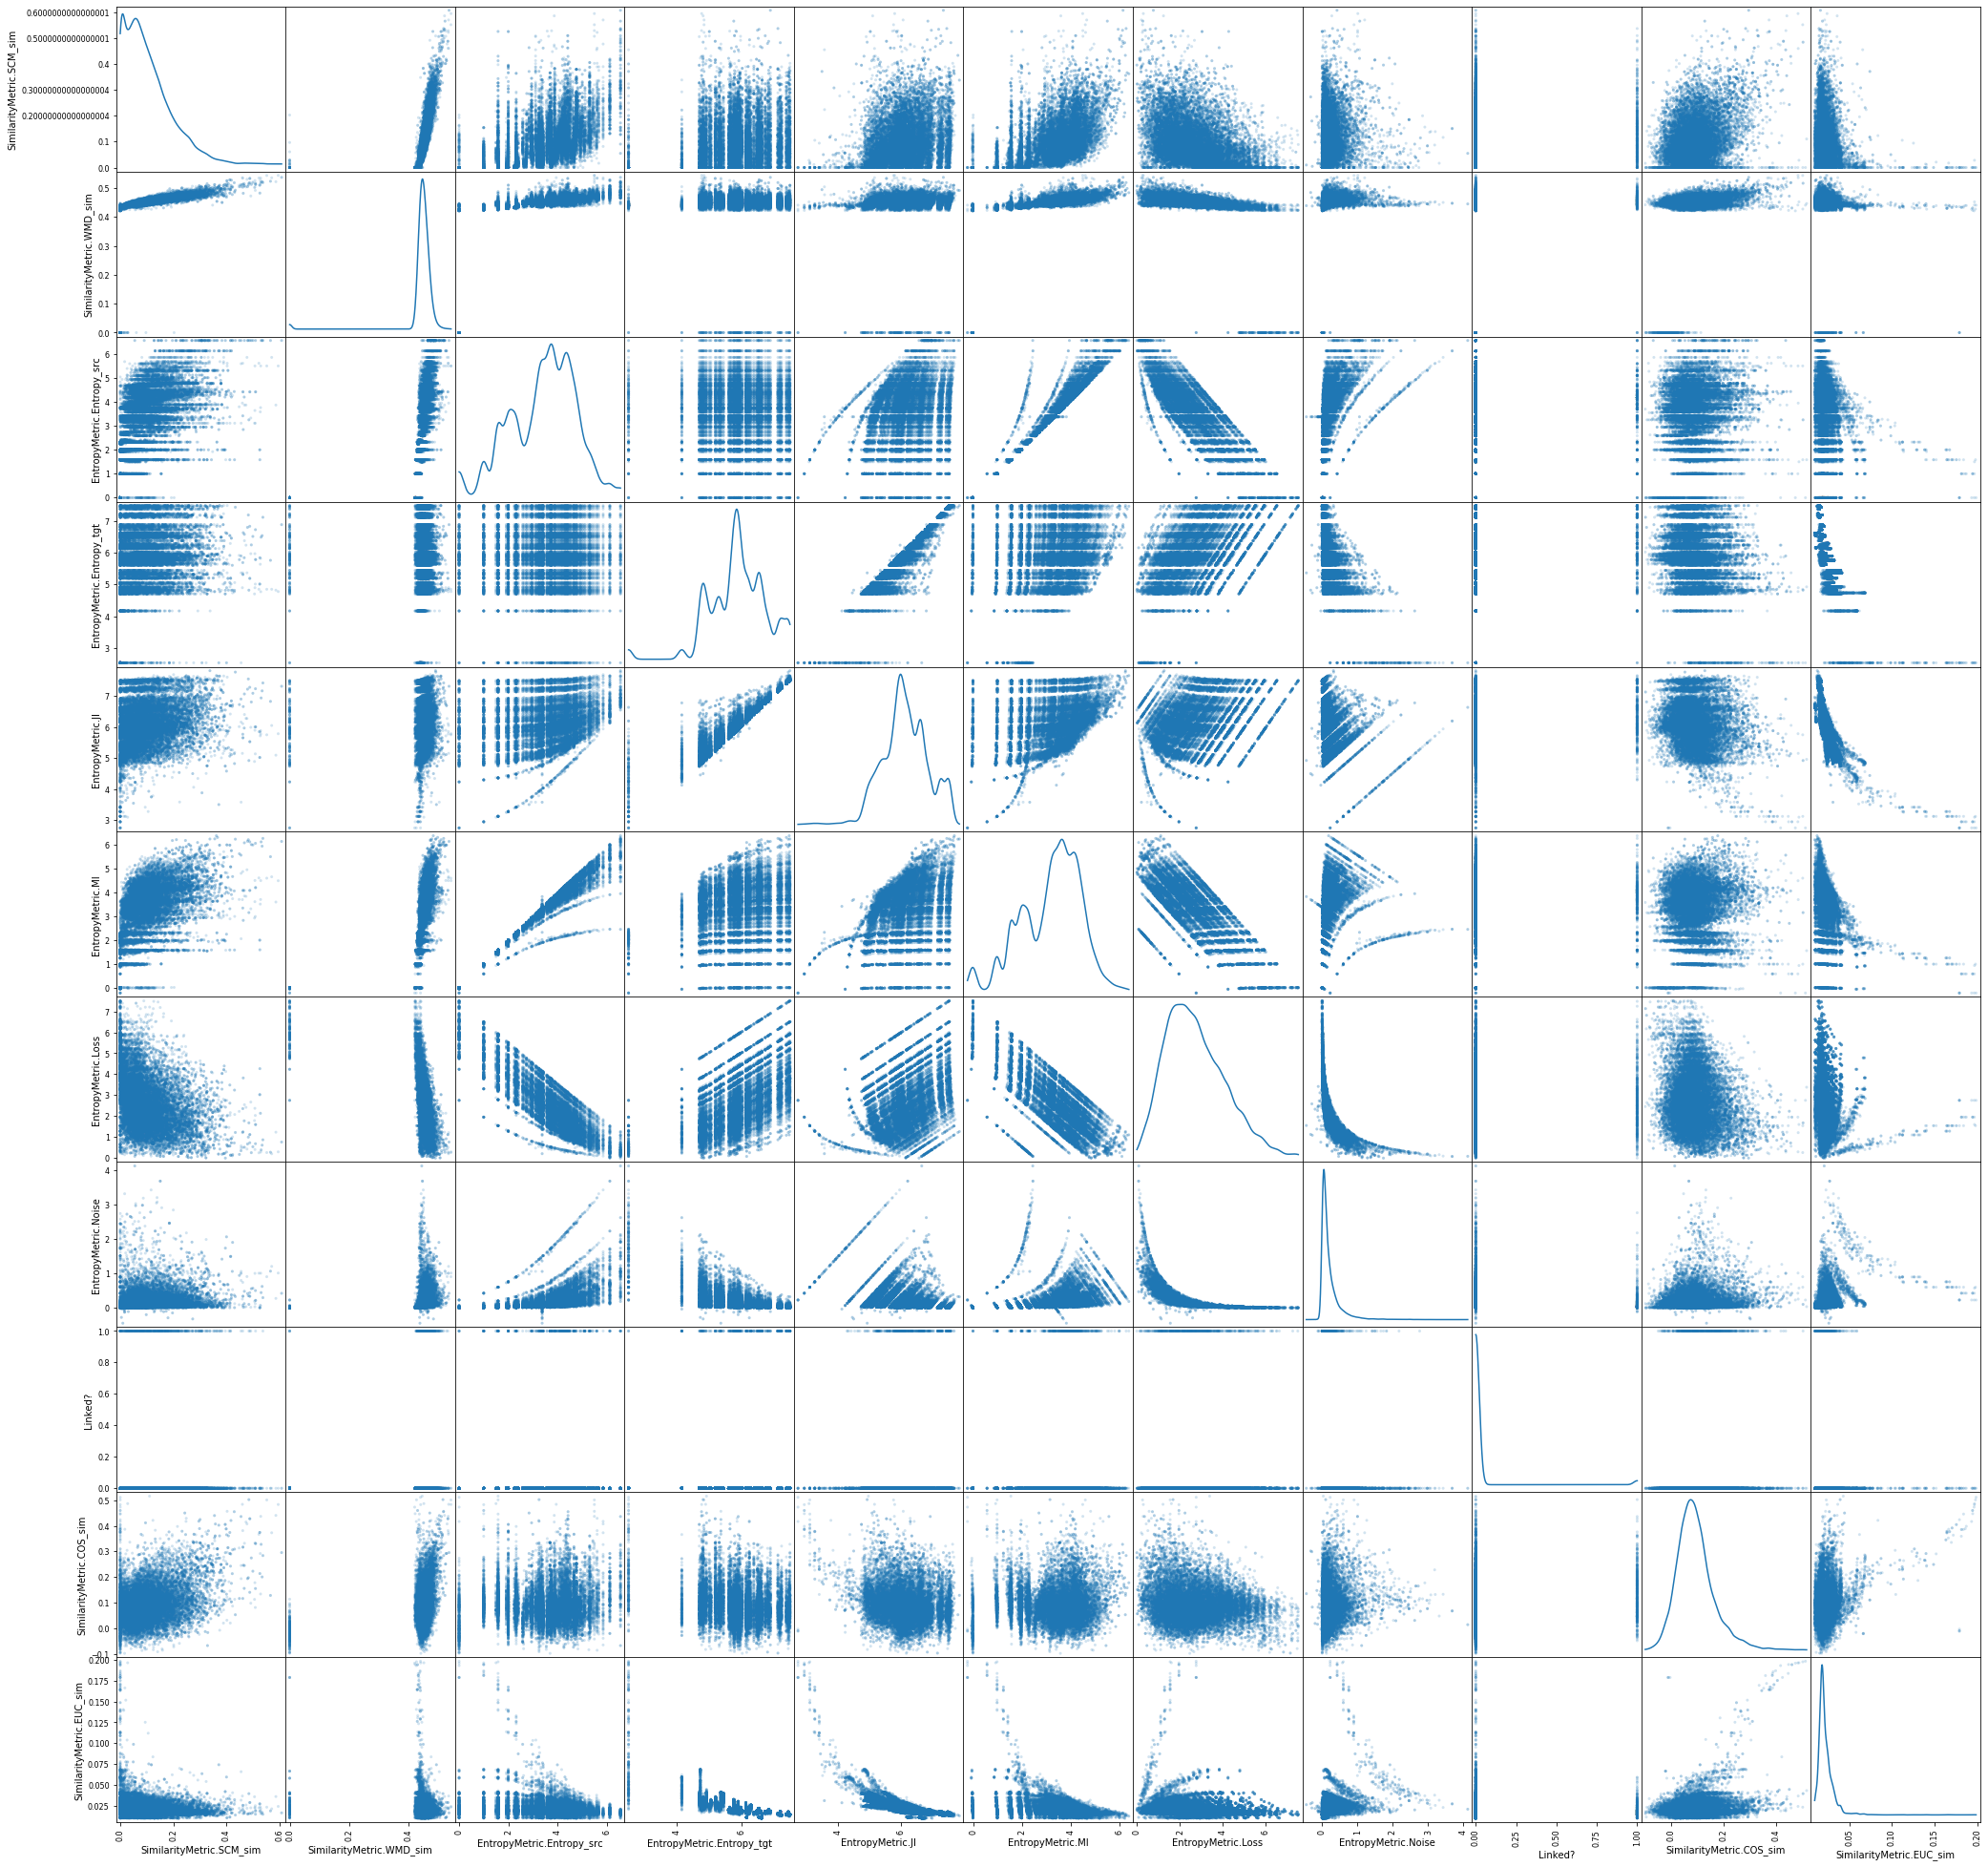

In [ ]:
scatter_matrix(EDA.manifoldEntropy, alpha=0.2, figsize=(35, 35), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6217aa12b0>,
      dtype=object)

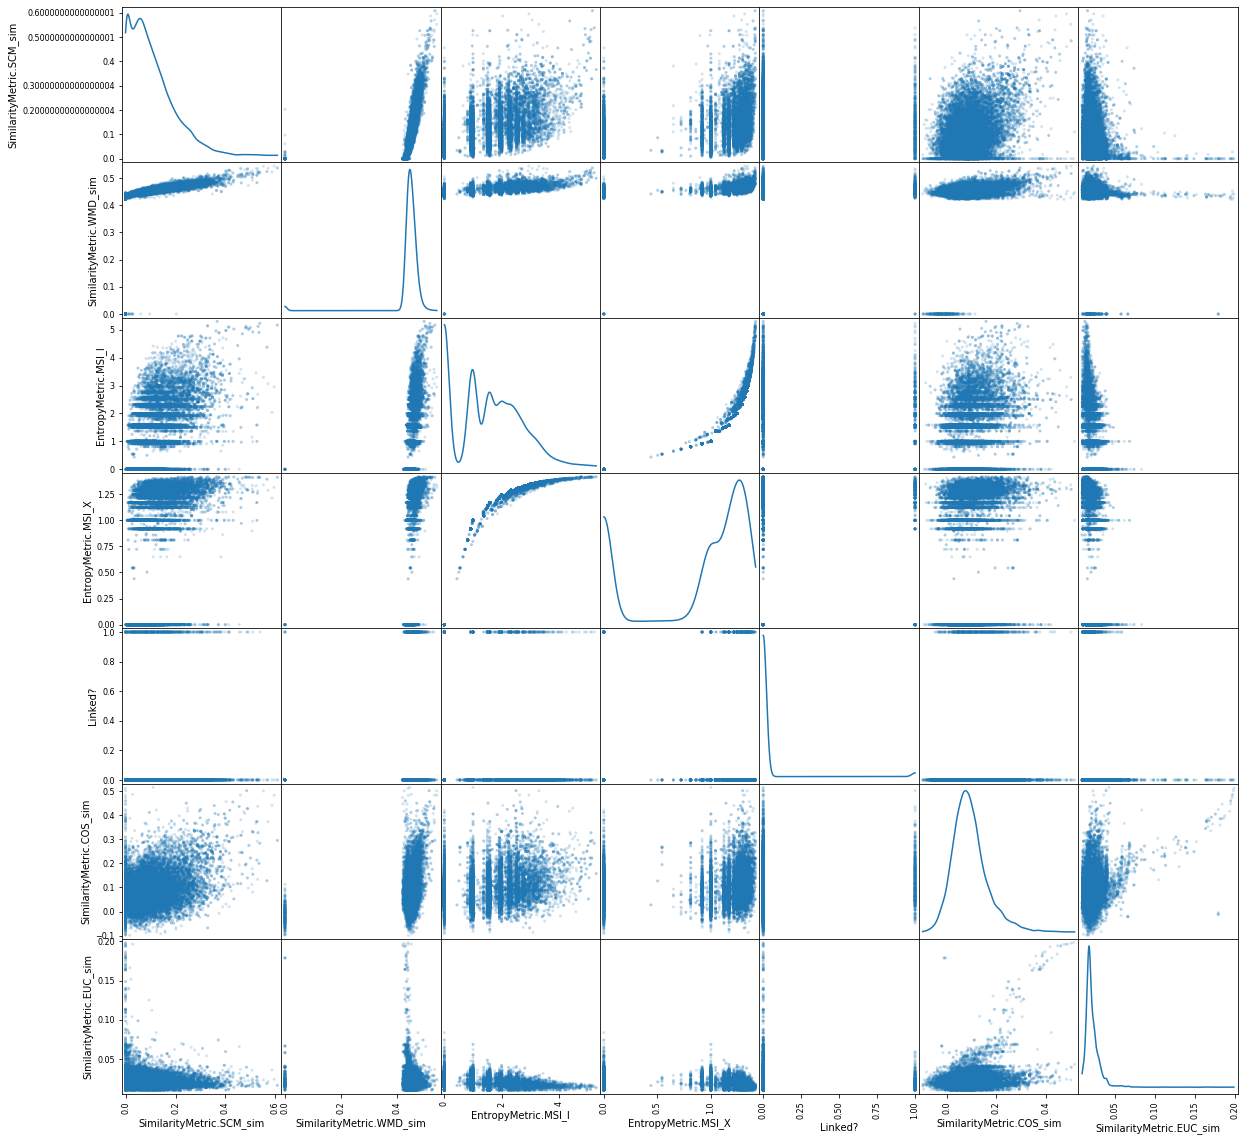

In [ ]:
scatter_matrix(EDA.sharedInfo, alpha=0.2, figsize=(20, 20), diagonal='kde')

Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random. The lag argument may be passed, and when lag=1 the plot is essentially data[:-1] vs. data[1:].

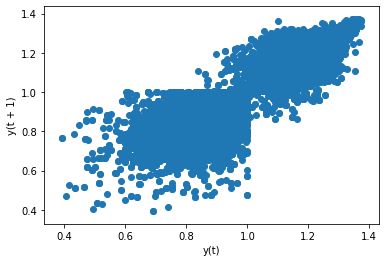

In [ ]:
lag_plot( EDA.df_w2v[['DistanceMetric.WMD','DistanceMetric.SCM']] )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f620da00cc0>,
      dtype=object)

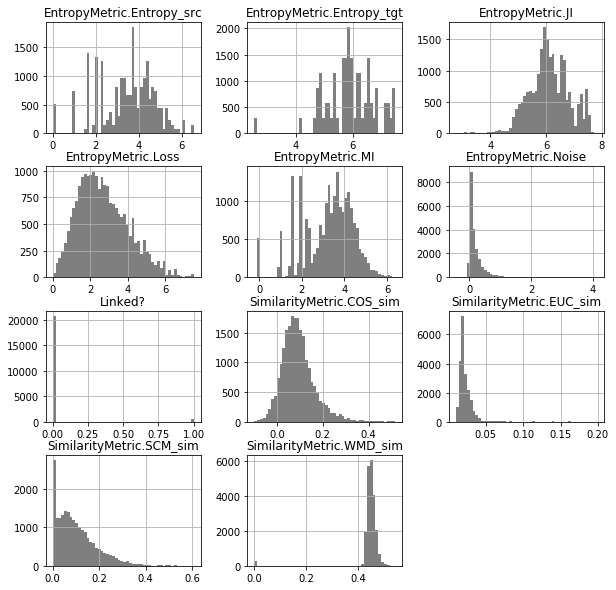

In [ ]:
EDA.manifoldEntropy.hist(color='k', bins=50, figsize=[10,10], alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f620d14e710>,
      dtype=object)

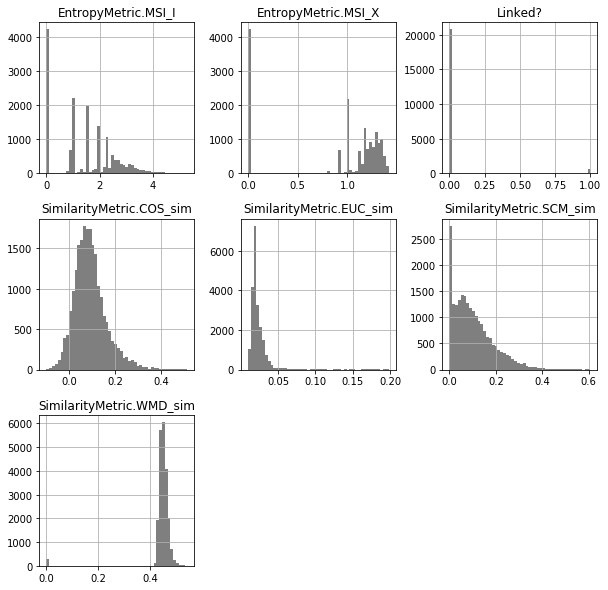

In [ ]:
EDA.sharedInfo.hist(color='k', bins=50, figsize=[10,10], alpha=0.5)

In [ ]:
##EDA.df_w2v[column_w2v].plot.kde()

In [ ]:
##EDA.df_w2v[column_w2v].plot.hist(density=True) # Histogram will now be normalized

In [ ]:
##EDA.df_d2v[column_d2v].plot.kde()

In [ ]:
##EDA.df_d2v[column_d2v].plot.hist(density=True) # Histogram will now be normalized

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f620cc60978>,
      dtype=object)

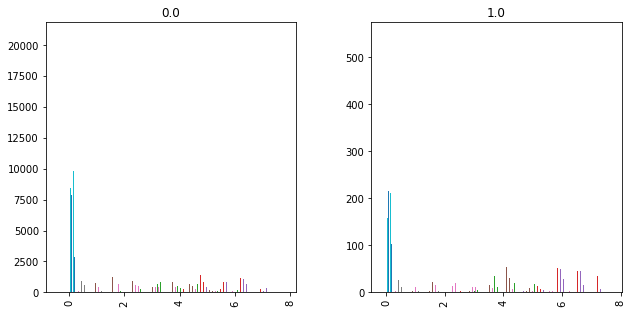

In [ ]:
EDA.manifoldEntropy.hist(by='Linked?' ,figsize=[10, 5],bins=80)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f620ccf0ef0>,
      dtype=object)

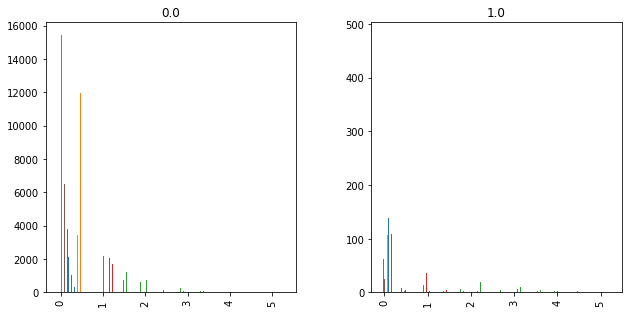

In [ ]:
EDA.sharedInfo.hist(by='Linked?' ,figsize=[10, 5],bins=80)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62069fbe10>,
      dtype=object)

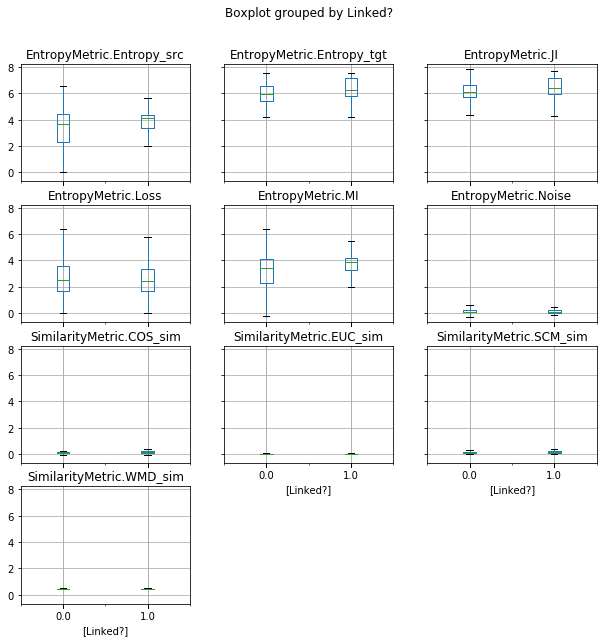

In [ ]:
EDA.manifoldEntropy.boxplot(by='Linked?',figsize=[10, 10], showfliers=False) #Without Outliers

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62062c3048>,
      dtype=object)

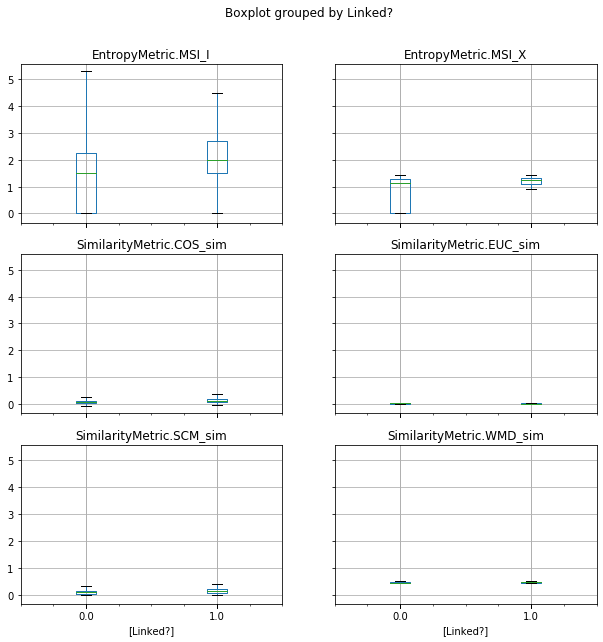

In [ ]:
EDA.sharedInfo.boxplot(by='Linked?',figsize=[10, 10], showfliers=False)

### EDA Self Entropy for SACP

In [ ]:
##Max Self Source
EDA.df_w2v[EDA.df_w2v['Target']=='sacp-python-common/setup.py'][['Source','Target','EntropyMetric.Entropy_tgt','Linked?']].values

array([[295, 'sacp-python-common/setup.py', 5.370004292053436, 0.0],
       [294, 'sacp-python-common/setup.py', 5.370004292053436, 0.0],
       [293, 'sacp-python-common/setup.py', 5.370004292053436, 0.0],
       ...,
       [5, 'sacp-python-common/setup.py', 5.370004292053436, 0.0],
       [1, 'sacp-python-common/setup.py', 5.370004292053436, 0.0],
       [2, 'sacp-python-common/setup.py', 5.370004292053436, 0.0]],
      dtype=object)

In [ ]:
EDA.df_w2v[EDA.df_w2v['Source']==193][['Source','Target','EntropyMetric.Entropy_src','EntropyMetric.Entropy_tgt','Linked?']].values

array([[193, 'sacp-python-common/sacp_python_common/auth_utility.py',
        5.095175521464347, 6.301552355933639, 1.0],
       [193, 'sacp-python-common/sacp_python_common/bandit/bandit.py',
        5.095175521464347, 6.7390055040216685, 0.0],
       [193,
        'sacp-python-common/sacp_python_common/bandit/banditReport.py',
        5.095175521464347, 5.870833373337848, 0.0],
       [193, 'sacp-python-common/sacp_python_common/cave/caveCa.py',
        5.095175521464347, 5.371881234145534, 0.0],
       [193, 'sacp-python-common/sacp_python_common/cave/caveSsl.py',
        5.095175521464347, 4.85108279267097, 0.0],
       [193, 'sacp-python-common/sacp_python_common/cave/caveZap.py',
        5.095175521464347, 6.139571208108156, 0.0],
       [193,
        'sacp-python-common/sacp_python_common/csbcicd_report/aggregator.py',
        5.095175521464347, 5.6097106273392585, 0.0],
       [193,
        'sacp-python-common/sacp_python_common/csbcicd_report/csbcicd_func.py',
        5.095175

In [ ]:
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_tgt']==EDA.df_w2v['EntropyMetric.Entropy_tgt'].quantile(.99)][['Source','Target','EntropyMetric.Entropy_tgt','Linked?']].values

In [ ]:
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_tgt']==EDA.df_w2v['EntropyMetric.Entropy_tgt'].min()][['Target']].values

array([['sacp-python-common/sacp_python_common/template/__init__.py'],
       ['sacp-python-common/sacp_python_common/template/__init__.py'],
       ['sacp-python-common/sacp_python_common/template/__init__.py'],
       ['sacp-python-common/sacp_python_common/template/__init__.py'],
       ['sacp-python-common/sacp_python_common/template/__init__.py'],
       ['sacp-python-common/sacp_python_common/template/__init__.py'],
       ['sacp-python-common/sacp_python_common/template/__init__.py'],
       ['sacp-python-common/sacp_python_common/template/__init__.py'],
       ['sacp-python-common/sacp_python_common/template/__init__.py'],
       ['sacp-python-common/sacp_python_common/template/__init__.py'],
       ['sacp-python-common/sacp_python_common/template/__init__.py'],
       ['sacp-python-common/sacp_python_common/template/__init__.py'],
       ['sacp-python-common/sacp_python_common/template/__init__.py'],
       ['sacp-python-common/sacp_python_common/template/__init__.py'],
      

In [ ]:
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_tgt']>=EDA.df_w2v['EntropyMetric.Entropy_tgt'].quantile(.97)][['Source','Target','EntropyMetric.Entropy_tgt','Linked?']].values

array([[295,
        'sacp-python-common/sacp_python_common/security_results_push/security_results_push_func.py',
        7.502034948968415, 1.0],
       [295,
        'sacp-python-common/sacp_python_common/third_party/binary_scan_func.py',
        7.4800077110143315, 1.0],
       [295,
        'sacp-python-common/sacp_python_common/third_party/run_ipcentral_automation.py',
        7.450178124335845, 0.0],
       ...,
       [2,
        'sacp-python-common/sacp_python_common/security_results_push/security_results_push_func.py',
        7.502034948968415, 0.0],
       [2,
        'sacp-python-common/sacp_python_common/third_party/binary_scan_func.py',
        7.4800077110143315, 0.0],
       [2,
        'sacp-python-common/sacp_python_common/third_party/run_ipcentral_automation.py',
        7.450178124335845, 0.0]], dtype=object)

In [ ]:
## Nan Shared Vectors

In [ ]:
df_nan_msi = EDA.df_w2v[np.isnan(EDA.df_w2v['EntropyMetric.MSI_I'])]

In [ ]:
df_nan_msi

Source                                             Target  \
9         295  sacp-python-common/sacp_python_common/ctsm2csd...   
11        295  sacp-python-common/sacp_python_common/fireExce...   
12        295  sacp-python-common/sacp_python_common/gosec/go...   
17        295  sacp-python-common/sacp_python_common/psb_mapp...   
21        295  sacp-python-common/sacp_python_common/spotbugs...   
...       ...                                                ...   
21250       2  sacp-python-common/sacp_python_common/gosec/go...   
21255       2  sacp-python-common/sacp_python_common/psb_mapp...   
21259       2  sacp-python-common/sacp_python_common/spotbugs...   
21260       2  sacp-python-common/sacp_python_common/template...   
21279       2  sacp-python-common/sacp_python_common/webex_se...   

       DistanceMetric.WMD  SimilarityMetric.WMD_sim  DistanceMetric.SCM  \
9                1.230672                  0.448295            0.895580   
11               1.245996                  0.445237            0.947094   
12               1.230569                  0.448316            0.896543   
17               1.283152                  0.437991            0.977981   
21               1.226556                  0.449124            0.910101   
...                   ...                       ...                 ...   
21250            1.230569                  0.448316            0.896543   
21255            1.283152                  0.437991            0.977981   
21259            1.226556                  0.449124            0.910101   
21260            1.250766                  0.444293            0.943774   
21279            1.231275                  0.448174            0.943103   

       SimilarityMetric.SCM_sim  EntropyMetric.MSI_I  EntropyMetric.MSI_X  \
9                      0.104420                  NaN                  NaN   
11                     0.052906                  NaN                  NaN   
12                     0.103457                  NaN                  NaN   
17                     0.022019                  NaN                  NaN   
21                     0.089899                  NaN                  NaN   
...                         ...                  ...                  ...   
21250                  0.103457                  NaN                  NaN   
21255                  0.022019                  NaN                  NaN   
21259                  0.089899                  NaN                  NaN   
21260                  0.056226                  NaN                  NaN   
21279                  0.056897                  NaN                  NaN   

       EntropyMetric.Entropy_src  EntropyMetric.Entropy_tgt  EntropyMetric.JI  \
9                        3.70044                   5.768002          5.970172   
11                       3.70044                   4.165014          4.892702   
12                       3.70044                   5.449969          5.705801   
17                       3.70044                   5.945464          6.058440   
21                       3.70044                   4.927561          5.287861   
...                          ...                        ...               ...   
21250                    3.70044                   5.449969          5.705801   
21255                    3.70044                   5.945464          6.058440   
21259                    3.70044                   4.927561          5.287861   
21260                    3.70044                   2.521641          4.221928   
21279                    3.70044                   4.736229          5.250999   

       EntropyMetric.MI  EntropyMetric.Loss  EntropyMetric.Noise  Linked?  
9              3.498270            2.269732             0.202170      0.0  
11             2.972751            1.192262             0.727688      0.0  
12             3.444608            2.005361             0.255832      0.0  
17             3.587464            2.358000             0.112976      1.0  
21         

In [ ]:
df_nan_msi[df_nan_msi['Linked?']==1][['Source','Target','SimilarityMetric.WMD_sim']].to_csv('msi_i_sacp.csv')

### Special Cases SACP

In [ ]:
EDA.df_w2v.head(1)

Source                                             Target  \
0     295  sacp-python-common/sacp_python_common/auth_uti...   

   DistanceMetric.WMD  SimilarityMetric.WMD_sim  DistanceMetric.SCM  \
0            1.226182                    0.4492            0.889624   

   SimilarityMetric.SCM_sim  EntropyMetric.MSI_I  EntropyMetric.MSI_X  \
0                  0.110376             1.584963             1.169925   

   EntropyMetric.Entropy_src  EntropyMetric.Entropy_tgt  EntropyMetric.JI  \
0                    3.70044                   6.301552          6.400817   

   EntropyMetric.MI  EntropyMetric.Loss  EntropyMetric.Noise  Linked?  
0          3.601175            2.700378             0.099265      0.0

In [ ]:
EDA.df_sys.head(1)

ids                                               text type  \
0  295  Production Merge * Feed release name through t...   pr   

                                                conv  
0  product merg feed releas name upload bom allow...

In [ ]:
## Edges cases 

In [ ]:
## MAX MSI_I
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MSI_I']==EDA.df_w2v['EntropyMetric.MSI_I'].min()][['Source','Target','EntropyMetric.MSI_I','Linked?']].values[70]

array([292,
       'sacp-python-common/sacp_python_common/harden_check/harden_func.py',
       0.0, 0.0], dtype=object)

In [ ]:
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MSI_I']==EDA.df_w2v['EntropyMetric.MSI_I'].min()][['Source','Target','EntropyMetric.MSI_I','Linked?']].values

In [ ]:
##Max Loss
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Loss']==EDA.df_w2v['EntropyMetric.Loss'].max()][['Source','Target','EntropyMetric.Loss','Linked?']].values

array([[241,
        'sacp-python-common/sacp_python_common/security_results_push/security_results_push_func.py',
        7.505229986653098, 0.0],
       [168,
        'sacp-python-common/sacp_python_common/security_results_push/security_results_push_func.py',
        7.505229986653098, 0.0],
       [144,
        'sacp-python-common/sacp_python_common/security_results_push/security_results_push_func.py',
        7.505229986653098, 0.0],
       [128,
        'sacp-python-common/sacp_python_common/security_results_push/security_results_push_func.py',
        7.505229986653098, 0.0],
       [113,
        'sacp-python-common/sacp_python_common/security_results_push/security_results_push_func.py',
        7.505229986653098, 0.0],
       [101,
        'sacp-python-common/sacp_python_common/security_results_push/security_results_push_func.py',
        7.505229986653098, 0.0],
       [41,
        'sacp-python-common/sacp_python_common/security_results_push/security_results_push_func.py',
     

In [ ]:
EDA.df_sys[EDA.df_sys['ids'] == 'sacp-python-common/sacp_python_common/security_results_push/security_results_push_func.py']['text'].values

array(['#!/usr/bin/env python3\r\n\r\nimport copy\r\nimport datetime\r\nimport hashlib\r\nimport json\r\nimport logging\r\nimport os\r\nimport sys\r\n\r\nimport boto3\r\n\r\nfrom sacp_python_common.fireException import fireException\r\nfrom sacp_python_common.psb_mapping import scf_psb_mapping\r\n\r\nLOG = logging.getLogger("security_results_push_func")\r\nlogging.basicConfig(stream=sys.stdout, level=logging.INFO)\r\n\r\n# SQS Details\r\nregion = "us-west-2"\r\nq_type = "sqs"\r\naccount_number = "962705020265"\r\nq_name = "audit_aggregator_queue.fifo"\r\nq_url = "https://{}.{}.amazonaws.com/{}/{}".format(\r\n    q_type, region, account_number, q_name\r\n)\r\n\r\n\r\ndef psb_binary(corona_dir=None, bd_dir=None, ipc_dir=None):\r\n    """Calls process binary functions to help add psb test data\r\n    Arguments:\r\n        corona_dir {str} -- Corona directory (default: None)\r\n        bd_dir {str} -- BlackDuck directory (default: None)\r\n        ipc_dir {str} -- IP Central directory (def

In [ ]:
EDA.df_sys[EDA.df_sys['ids'] == '41']['text'].values

array(['Update binary_scan_func.py (#40)  '], dtype=object)

In [ ]:
##Min Loss
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Loss']==EDA.df_w2v['EntropyMetric.Loss'].min()][['Source','Target','EntropyMetric.Loss','Linked?']].values

array([[256, 'sacp-python-common/sacp_python_common/third_party/cve.py',
        -0.010363686453112031, 1.0],
       [56, 'sacp-python-common/sacp_python_common/third_party/cve.py',
        -0.010363686453112031, 0.0]], dtype=object)

In [ ]:
#Quantiles and Links
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Loss']>=EDA.df_w2v['EntropyMetric.Loss'].quantile(.99)][['Source','Target','EntropyMetric.Loss','Linked?']].values

array([[245,
        'sacp-python-common/sacp_python_common/security_results_push/security_results_push_func.py',
        6.506040253005677, 0.0],
       [245,
        'sacp-python-common/sacp_python_common/spotbugs/spotbugs.py',
        6.397075798268375, 0.0],
       [245,
        'sacp-python-common/sacp_python_common/third_party/binary_scan_func.py',
        6.4833488094213125, 0.0],
       [245,
        'sacp-python-common/sacp_python_common/third_party/run_ipcentral_automation.py',
        6.456834777930168, 0.0],
       [241, 'sacp-python-common/sacp_python_common/auth_utility.py',
        6.31055396952745, 0.0],
       [241, 'sacp-python-common/sacp_python_common/bandit/bandit.py',
        6.744945140243513, 0.0],
       [241,
        'sacp-python-common/sacp_python_common/csbcicd_report/csbcicd_func.py',
        7.247384315542133, 1.0],
       [241,
        'sacp-python-common/sacp_python_common/csbcicd_report/csbcicdReport.py',
        6.26266034562971, 0.0],
       [241,
   

In [ ]:
EDA.df_sys[EDA.df_sys['ids'] == '13']['text'].values

array(['BDscan  '], dtype=object)

In [ ]:
EDA.df_sys[EDA.df_sys['ids'] == 'sacp-python-common/sacp_python_common/auth_utility.py']['text'].values

array(['"""\r\nCreated on Aug 12, 2019\r\n\r\n@author: Aniketh Reddy(animalle)\r\n\r\nWrapper for common Cloud SSO API queries.\r\n\r\nUsage: #TODO\r\n\r\n"""\r\nimport json\r\nimport logging\r\nimport os\r\nimport sys\r\n\r\nimport requests\r\n\r\nLOG = logging.getLogger("OAuth-API")\r\nlogging.basicConfig(stream=sys.stdout, level=logging.INFO)\r\n\r\nHERE = os.path.dirname(os.path.realpath(__file__))\r\nsys.path.append(os.path.join(HERE, "vendored"))\r\n\r\n\r\nclass AuthInstance(object):\r\n    """\r\n    classdocs\r\n    """\r\n\r\n    config = dict()\r\n\r\n    def __init__(self, *args):\r\n\r\n        # try:\r\n        self.session = requests.Session()\r\n        self.config["username"] = args[0]\r\n        self.config["password"] = args[1]\r\n        self.config["id"] = "default"\r\n        self.config["secret"] = "default"\r\n        self.token = ""\r\n        self.get_auth_token()\r\n\r\n    def get_auth_token(self):\r\n        base_url = "https://cloudsso.cisco.com/as/token.o

In [ ]:
## Min and Max Noise
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Noise']==EDA.df_w2v['EntropyMetric.Noise'].max()][['Source','Target','EntropyMetric.Noise','Linked?']].values

array([[256,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        4.1179792783376925, 0.0],
       [56, 'sacp-python-common/sacp_python_common/template/__init__.py',
        4.1179792783376925, 0.0]], dtype=object)

In [ ]:
EDA.df_w2v['EntropyMetric.Noise'].quantile(.99)

1.5157605613107932

In [ ]:
#Quantiles and Links
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Noise']>=EDA.df_w2v['EntropyMetric.Noise'].quantile(.99)][['Source','Target','EntropyMetric.Noise','Linked?']].values

array([[295,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        1.7002874585440444, 0.0],
       [294, 'sacp-python-common/sacp_python_common/fireException.py',
        2.2292087682910897, 0.0],
       [294,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        3.677755327808581, 0.0],
       [294,
        'sacp-python-common/sacp_python_common/third_party/ipcReport.py',
        1.687583117712168, 0.0],
       [294, 'sacp-python-common/sacp_python_common/webex_send_func.py',
        1.7173152013339648, 0.0],
       [294,
        'sacp-python-common/test/python/third_party/test_corona_lite.py',
        1.5983847204931054, 0.0],
       [293, 'sacp-python-common/sacp_python_common/fireException.py',
        1.6610816146294578, 0.0],
       [293,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        2.977941830286627, 0.0],
       [287,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        2.

In [ ]:
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Noise']==EDA.df_w2v['EntropyMetric.Noise'].min()][['Source','Target','EntropyMetric.Noise','Linked?']].values

array([[213, 'sacp-python-common/setup.py', -0.4446231162933376, 0.0],
       [13, 'sacp-python-common/setup.py', -0.4446231162933376, 0.0]],
      dtype=object)

In [ ]:
##MaxMin Mutual Information
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MI']==EDA.df_w2v['EntropyMetric.MI'].min()][['Source','Target','EntropyMetric.MI','Linked?']].values

array([[241,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        -0.2283593636566814, 0.0],
       [168,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        -0.2283593636566814, 0.0],
       [144,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        -0.2283593636566814, 0.0],
       [128,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        -0.2283593636566814, 0.0],
       [113,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        -0.2283593636566814, 0.0],
       [101,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        -0.2283593636566814, 0.0],
       [41, 'sacp-python-common/sacp_python_common/template/__init__.py',
        -0.2283593636566814, 0.0]], dtype=object)

In [ ]:
#Quantiles and Links
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MI']>=EDA.df_w2v['EntropyMetric.MI'].quantile(.9999)][['Source','Target','EntropyMetric.MI','Linked?']].values

array([[256,
        'sacp-python-common/sacp_python_common/spotbugs/spotbugs.py',
        6.3096323256651745, 0.0],
       [256,
        'sacp-python-common/sacp_python_common/third_party/binary_scan_func.py',
        6.37898030507055, 1.0],
       [56, 'sacp-python-common/sacp_python_common/spotbugs/spotbugs.py',
        6.3096323256651745, 0.0],
       [56,
        'sacp-python-common/sacp_python_common/third_party/binary_scan_func.py',
        6.37898030507055, 0.0]], dtype=object)

In [ ]:
EDA.df_sys[EDA.df_sys['ids'] == '13']['text'].values

array(['BDscan  '], dtype=object)

## Supervised Evaluation

In [ ]:
#export
class SupervisedVectorEvaluation(VectorEvaluation):

    def __init__(self, params):
        super().__init__(params)
        
        #Word2vec
        similarities_w2v = self.sim_list_w2v + ['Linked?']
        similarities_w2v = [str(i) for i in similarities_w2v]
        self.df_filtered_w2v = self.df_w2v.copy()
        self.df_filtered_w2v = self.df_filtered_w2v[similarities_w2v] 
        self.df_filtered_w2v = self.df_filtered_w2v[~self.df_filtered_w2v.isin([np.nan, np.inf, -np.inf]).any(1)]
        
        #Doc2vec
        similarities_d2v = self.sim_list_d2v + ['Linked?']
        similarities_d2v = [str(i) for i in similarities_d2v]
        self.df_filtered_d2v = self.df_d2v.copy() 
        self.df_filtered_d2v = self.df_filtered_d2v[similarities_d2v]
        self.df_filtered_d2v = self.df_filtered_d2v[~self.df_filtered_d2v.isin([np.nan, np.inf, -np.inf]).any(1)]

        pass
    
    def vecTypeVerification(self, vecType= VectorizationType.word2vec):
        if vecType == VectorizationType.word2vec:
            self.sim_list = self.sim_list_w2v
            y_test = self.df_filtered_w2v['Linked?'].values
            y_score = [self.df_filtered_w2v[ str(sim) ].values for sim in self.sim_list]
            logging.info('Vectorization: ' +  str(vecType) )
        elif vecType == VectorizationType.doc2vec:
            self.sim_list = self.sim_list_d2v
            y_test = self.df_filtered_d2v['Linked?'].values
            y_score = [self.df_filtered_d2v[ str(sim) ].values for sim in self.sim_list]
            logging.info('Vectorization: ' +  str(vecType) )
        return y_test,y_score
    
    def Compute_precision_recall_gain(self, vecType = VectorizationType.word2vec):
        '''One might choose PRG if there is little interest in identifying false negatives '''
        y_test,y_score = self.vecTypeVerification(vecType=vecType)    
        
        for count,sim in enumerate(self.sim_list):
            prg_curve = prg.create_prg_curve(y_test, y_score[count])
            auprg = prg.calc_auprg(prg_curve)
            prg.plot_prg(prg_curve)
            logging.info('auprg:  %.3f' %  auprg)
            logging.info("compute_precision_recall_gain Complete: "+str(sim))
        pass
    
    def Compute_avg_precision(self, vecType = VectorizationType.word2vec):
        '''Generated precision-recall curve enhanced'''
        y_test,y_score = self.vecTypeVerification(vecType=vecType)
        
        linestyles = ['solid','dashed','dashdot','dotted']
        
        fig, ax1 = plt.subplots(figsize=(8, 6))
        
        ax1.grid(True)
        #ax1.yaxis.grid(color='gray', linestyle='dashed')
        
        color = 'tab:red'
        ax1.set_xlabel('recall [fpr]')
        ax1.set_ylabel('precision', color=color)
        
        # calculate the no skill line as the proportion of the positive class
        no_skill = len(y_test[y_test==1]) / len(y_test)
        ax1.plot([0, 1], [no_skill, no_skill], color=color, linewidth=0.5, linestyle='dotted', label='No Skill [{0:0.2f}]'.format(no_skill)) #reference curve
        
        for count,sim in enumerate(self.sim_list):
            precision, recall, _ = precision_recall_curve(y_test, y_score[count]) #compute precision-recall curve
            average_precision = average_precision_score(y_test, y_score[count])
            auc_score = auc(recall, precision)
            logging.info('Average precision-recall score: {0:0.2f}'.format(average_precision))
            logging.info('Precision-Recall AUC: %.2f' % auc_score)
            
            #plt.plot(recall, precision, linewidth=0.4, marker='.', label = str(sim)) #plot model curve
            ax1.plot(recall, precision, color=color, linewidth=1, linestyle=linestyles[count], label = str(sim.name)+' [auc:{0:0.2f}]'.format(auc_score)) #plot model curve
            
            pass     
        
        ax1.tick_params(axis='y', labelcolor=color) #Color of the axis value
        
        
        ##AUC
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        
        color = 'tab:blue'
        ax2.set_ylabel('tpr', color=color)  # we already handled the x-label with ax1
        
        ax2.plot([0, 1], [0, 1], color=color,  linewidth=0.5, linestyle='dotted', label='No Skill') #reference curve
        for count,sim in enumerate(self.sim_list):
            fpr, tpr, _ = roc_curve(y_test, y_score[count]) #compute roc curve
            roc_auc = roc_auc_score(y_test, y_score[count])
            logging.info('ROC AUC %.2f' % roc_auc)
            
            ax2.plot(fpr, tpr, color=color, linewidth=1, linestyle=linestyles[count], label = str(sim.name)+ ' [auc:{0:0.2f}]'.format(roc_auc)) #plot model curve
            pass   
        
        ax2.tick_params(axis='y', labelcolor=color) #Color of the axis value
        
        ##Design
        ax1.legend(loc='upper center',ncol=3, fontsize= 'small')
        ax2.legend(loc='lower center',ncol=3, fontsize= 'small')
        
        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        
        #plt.set_axisbelow(True)
        #plt.yaxis.grid(color='gray', linestyle='dashed')
        
        plt.title( params['system'] + "-[" + str(vecType) + "]")
        plt.show() #show the plot
        pass
    
    def __Compute_avg_precision_same_plot(self, vecType = VectorizationType.word2vec):
        '''Generated precision-recall curve'''

        y_test,y_score = self.vecTypeVerification(vecType=vecType)
        
        # calculate the no skill line as the proportion of the positive class
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill], linewidth=0.5, linestyle='--', label='No Skill [{0:0.2f}]'.format(no_skill)) #reference curve
        
        for count,sim in enumerate(self.sim_list):
            precision, recall, _ = precision_recall_curve(y_test, y_score[count]) #compute precision-recall curve
            average_precision = average_precision_score(y_test, y_score[count])
            auc_score = auc(recall, precision)
            logging.info('Average precision-recall score: {0:0.2f}'.format(average_precision))
            logging.info('Precision-Recall AUC: %.2f' % auc_score)
            
            #plt.plot(recall, precision, linewidth=0.4, marker='.', label = str(sim)) #plot model curve
            plt.plot(recall, precision, linewidth=1, label = str(sim)+ ' [auc:{0:0.2f}]'.format(auc_score)) #plot model curve
            pass
        
        plt.title(str(vecType))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(fontsize=9) #show the legend
        plt.show() #show the plot
        pass
    
    def __Compute_roc_curve(self, vecType = VectorizationType.word2vec):
        
        y_test,y_score = self.vecTypeVerification(vecType = vecType)

        plt.plot([0, 1], [0, 1],  linewidth=0.5, linestyle='--', label='No Skill') #reference curve
        
        for count,sim in enumerate(self.sim_list):
            fpr, tpr, _ = roc_curve(y_test, y_score[count]) #compute roc curve
            roc_auc = roc_auc_score(y_test, y_score[count])
            logging.info('ROC AUC %.2f' % roc_auc)
            
            plt.plot(fpr, tpr,  linewidth=1, label = str(sim)+  ' [auc:{0:0.2f}]'.format(roc_auc)) #plot model curve
            pass
        plt.title(str(vecType))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(fontsize=9) #show the legend
        plt.show() #show the plot

        pass
    
    def CofusionMatrix(self, vecType = VectorizationType.word2vec):
        ##TODO This implementatin is incomplete and not verify it yet
        y_test,y_score = self.vecTypeVerification(vecType=vecType)
        y_score_threshold = [0 if elem<=0.8 else 1 for elem in supevisedEval.y_score] #Hardcoded 0.7 Threshold
        #TODO a Variation threshold analysis
        tn, fp, fn, tp = confusion_matrix(supevisedEval.y_test, y_score_threshold).ravel()
        return tn, fp, fn, tp

## Plotting

In [ ]:
#params = sacp_params()
#params = libest_params()

In [ ]:
supevisedEval = SupervisedVectorEvaluation(params = params) #<---- Parameter 

In [ ]:
supevisedEval.df_w2v.head(2)

Source                                             Target  \
0     295  sacp-python-common/sacp_python_common/auth_uti...   
1     295  sacp-python-common/sacp_python_common/bandit/b...   

   DistanceMetric.WMD  SimilarityMetric.WMD_sim  DistanceMetric.SCM  \
0            1.226182                  0.449200            0.889624   
1            1.223128                  0.449817            0.859788   

   SimilarityMetric.SCM_sim  EntropyMetric.MSI_I  EntropyMetric.MSI_X  \
0                  0.110376             1.584963             1.169925   
1                  0.140212             1.584963             1.169925   

   EntropyMetric.Entropy_src  EntropyMetric.Entropy_tgt  EntropyMetric.JI  \
0                    3.70044                   6.301552          6.400817   
1                    3.70044                   6.739006          6.805642   

   EntropyMetric.MI  EntropyMetric.Loss  EntropyMetric.Noise  Linked?  
0          3.601175            2.700378             0.099265      0.0  
1          3.633803            3.105203             0.066637      0.0

In [ ]:
supevisedEval.df_d2v.head(2)

Source                                             Target  \
0     295  sacp-python-common/sacp_python_common/auth_uti...   
1     295  sacp-python-common/sacp_python_common/bandit/b...   

   DistanceMetric.EUC  SimilarityMetric.EUC_sim  DistanceMetric.COS  \
0           40.240574                  0.024248            0.899173   
1           57.382904                  0.017128            0.995134   

   SimilarityMetric.COS_sim  DistanceMetric.MAN  SimilarityMetric.MAN_sim  \
0                  0.100827          724.167175                  0.001379   
1                  0.004866         1018.684509                  0.000981   

   SimilarityMetric.Pearson  Linked?  
0                  0.099900      0.0  
1                  0.004389      0.0

In [ ]:
supevisedEval.df_filtered_w2v.size

63936

In [ ]:
supevisedEval.df_w2v.size

319680

In [ ]:
supevisedEval.df_w2v[ 'Linked?' ].values

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
[k for k in supevisedEval.df_w2v[ 'Linked?' ].values if k == 1]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [ ]:
y_test,y_score = supevisedEval.vecTypeVerification(VectorizationType.word2vec)

2021-01-13 04:18:02,469 : INFO : Vectorization: VectorizationType.word2vec


In [ ]:
y_test,y_score = supevisedEval.vecTypeVerification(VectorizationType.doc2vec)

2021-01-13 04:17:44,540 : INFO : Vectorization: VectorizationType.doc2vec


In [ ]:
[k for k in y_test if k == 1]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

### 1. Compute the average precision score and Compute ROC Curve
Precision is a metric that quantifies the number of correct positive predictions made.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

An ROC curve (or receiver operating characteristic curve) is a plot that summarizes the performance of a binary classification model on the positive class [(see Blog)](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/).

Use ROC when both classes detection is equally important — When we want to give equal weight to both classes prediction ability we should look at the ROC curve [link](https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba).

2021-01-13 04:18:45,045 : INFO : Vectorization: VectorizationType.word2vec
2021-01-13 04:18:45,079 : INFO : Average precision-recall score: 0.04
2021-01-13 04:18:45,080 : INFO : Precision-Recall AUC: 0.04
2021-01-13 04:18:45,092 : INFO : Average precision-recall score: 0.05
2021-01-13 04:18:45,092 : INFO : Precision-Recall AUC: 0.04
2021-01-13 04:18:45,130 : INFO : ROC AUC 0.62
2021-01-13 04:18:45,143 : INFO : ROC AUC 0.62


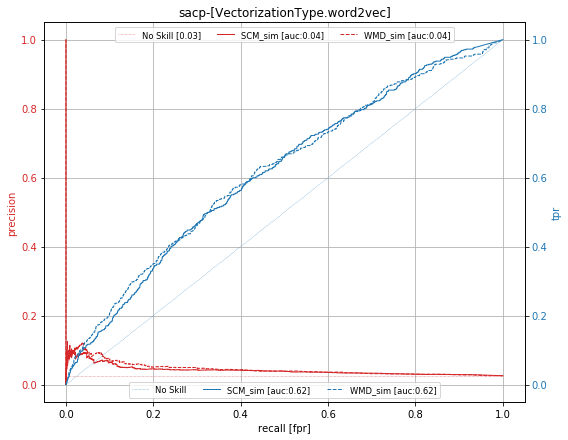

In [ ]:
supevisedEval.Compute_avg_precision(VectorizationType.word2vec)

2021-01-13 04:19:15,823 : INFO : Vectorization: VectorizationType.doc2vec
2021-01-13 04:19:15,859 : INFO : Average precision-recall score: 0.05
2021-01-13 04:19:15,860 : INFO : Precision-Recall AUC: 0.05
2021-01-13 04:19:15,874 : INFO : Average precision-recall score: 0.02
2021-01-13 04:19:15,874 : INFO : Precision-Recall AUC: 0.02
2021-01-13 04:19:15,905 : INFO : ROC AUC 0.64
2021-01-13 04:19:15,919 : INFO : ROC AUC 0.40


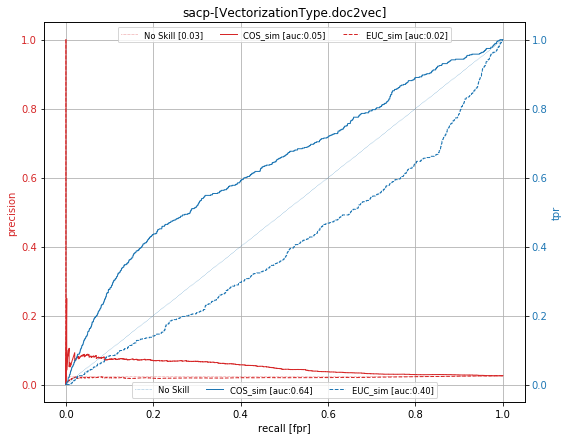

In [ ]:
supevisedEval.Compute_avg_precision(VectorizationType.doc2vec)

### 2. Precision-Racall-Gain
Based on the library here: [link](https://github.com/meeliskull/prg/tree/master/Python_package). 
The area under traditional PR curves can easily favour models with lower expected F1 score than others, and so the use of Precision-Recall-Gain curves will result in better model selection [(Flach & Kull, 2015)](http://people.cs.bris.ac.uk/~flach//PRGcurves/).
One might choose PRG if there is little interest in identifying false negatives [(from Blog)](https://medium.com/@alexabate/i-did-something-boring-so-you-dont-have-to-9140ca46c84d).

2021-01-13 04:19:33,817 : INFO : Vectorization: VectorizationType.word2vec


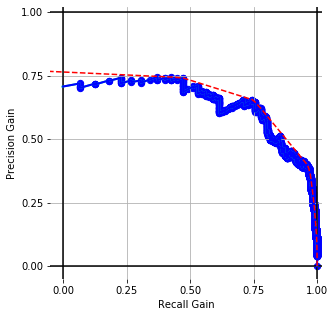

2021-01-13 04:19:34,171 : INFO : auprg:  0.639
2021-01-13 04:19:34,172 : INFO : compute_precision_recall_gain Complete: SimilarityMetric.SCM_sim


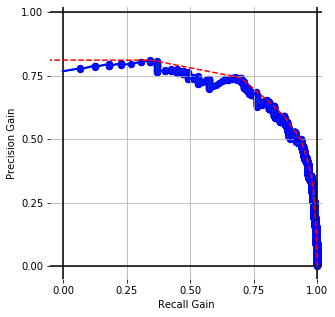

2021-01-13 04:19:34,533 : INFO : auprg:  0.703
2021-01-13 04:19:34,533 : INFO : compute_precision_recall_gain Complete: SimilarityMetric.WMD_sim


In [ ]:
supevisedEval.Compute_precision_recall_gain(VectorizationType.word2vec)

2021-01-13 04:22:37,440 : INFO : Vectorization: VectorizationType.doc2vec


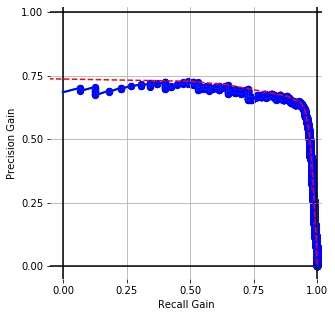

2021-01-13 04:22:37,811 : INFO : auprg:  0.676
2021-01-13 04:22:37,812 : INFO : compute_precision_recall_gain Complete: SimilarityMetric.COS_sim


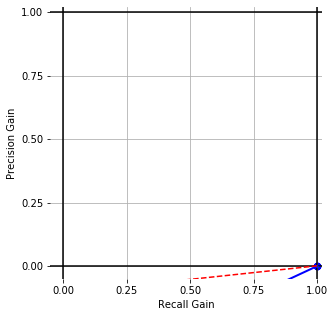

2021-01-13 04:22:38,074 : INFO : auprg:  -0.326
2021-01-13 04:22:38,075 : INFO : compute_precision_recall_gain Complete: SimilarityMetric.EUC_sim


In [ ]:
supevisedEval.Compute_precision_recall_gain(VectorizationType.doc2vec)

In [ ]:
SimilarityMetric.WMD_sim.name

'WMD_sim'

## Manifold Entropy Plots

In [ ]:
#export
class ManifoldEntropy(VectorEvaluation):
    def __init__(self, params):
        super().__init__(params)
        self.sharedEntropy_filtered = self.sharedInfo.copy()
        self.sharedEntropy_filtered.dropna(inplace=True)
        pass
    
    def minimum_shared_entropy(self,dist = SimilarityMetric.WMD_sim, extropy=False):
        '''Minimum Shared Plot'''
        ent = EntropyMetric.MSI_I
        color = 'DarkBlue'
        if extropy:
            ent = EntropyMetric.MSI_X
            color = 'Red'
        columns = [str(i) for i in [ent, dist ]]
        
        x1 = self.sharedEntropy_filtered.plot.scatter(
            x = columns[0],
            y = columns[1], 
            c = color, 
            s = 1,
            title = params['system']+': ['+ dist.name + '-' + ent.name + '] Correlation {%.2f}' % self.compute_spearman_corr(
                self.sharedEntropy_filtered, columns)
        )
        pass
    
    def manifold_entropy_plot(self, manifold = EntropyMetric.MI, dist = SimilarityMetric.WMD_sim):
        '''Manifold Entropy'''
        
        columns = [str(i) for i in [manifold, dist]]
        
        x1 = self.manifoldEntropy.plot.scatter(
            x = columns[0],
            y = columns[1], 
            c = 'DarkBlue', 
            s = 1,
            title = params['system']+': ['+ dist.name + '-' + manifold.name + '] Correlation {%.2f}' % self.compute_spearman_corr(
                self.manifoldEntropy, columns)
        )
        pass
    
    def composable_entropy_plot(self, 
                                manifold_x = EntropyMetric.MI,
                                manifold_y = EntropyMetric.Loss,
                                dist = SimilarityMetric.WMD_sim 
                               ):
    
        columns = [str(i) for i in [manifold_x, manifold_y, dist]]
        fig, ax = plt.subplots()
        self.manifoldEntropy.plot.scatter(
            x = columns[0],
            y = columns[1],
            c = columns[2],
            #figsize = [12, 6],
            title = params['system']+': Information-Semantic Interactions '+ dist.name ,
            colormap = 'viridis',
            ax = ax,
            s=1
        )
        ax.set_xlabel( columns[0] )
        ax.set_ylabel( columns[1] )    
        pass
    
    def compute_spearman_corr(self, filter_metrics_01, columns):
        df_correlation = filter_metrics_01.copy() 
        correlation = df_correlation[columns].corr(method='spearman')
        #correlation = df_correlation.corr(method='spearman')
        return correlation[columns[0]].values[1]

In [ ]:
manifoldEntropy = ManifoldEntropy(params = params) 

### Minimum Shared Entropy and Distances

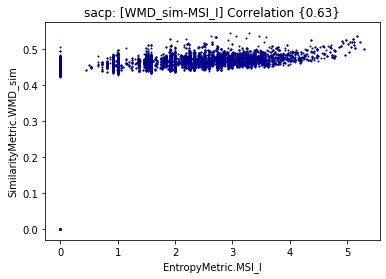

In [ ]:
manifoldEntropy.minimum_shared_entropy(dist=SimilarityMetric.WMD_sim)

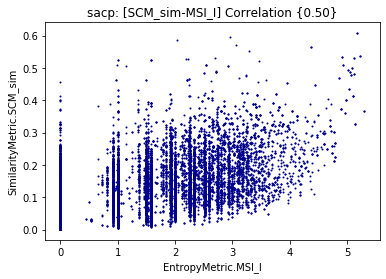

In [ ]:
manifoldEntropy.minimum_shared_entropy(dist=SimilarityMetric.SCM_sim)

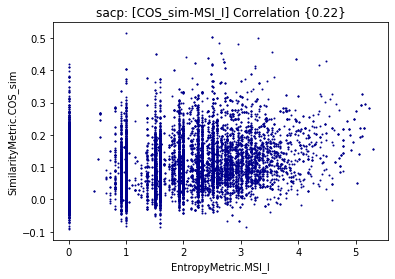

In [ ]:
manifoldEntropy.minimum_shared_entropy(dist=SimilarityMetric.COS_sim)

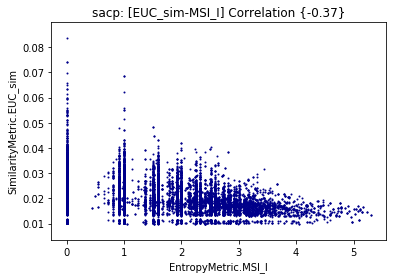

In [ ]:
manifoldEntropy.minimum_shared_entropy(dist=SimilarityMetric.EUC_sim)

### Minimum Shared Extropy and Distances

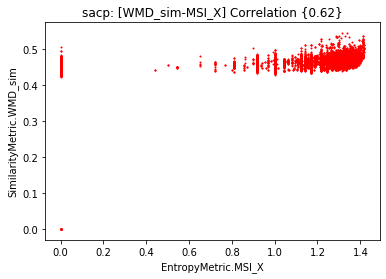

In [ ]:
manifoldEntropy.minimum_shared_entropy(dist=SimilarityMetric.WMD_sim, extropy=True)

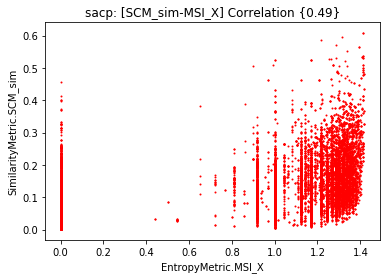

In [ ]:
manifoldEntropy.minimum_shared_entropy(dist=SimilarityMetric.SCM_sim, extropy=True)

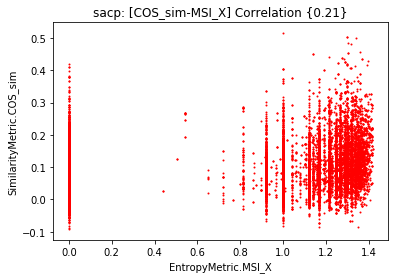

In [ ]:
manifoldEntropy.minimum_shared_entropy(dist=SimilarityMetric.COS_sim, extropy=True)

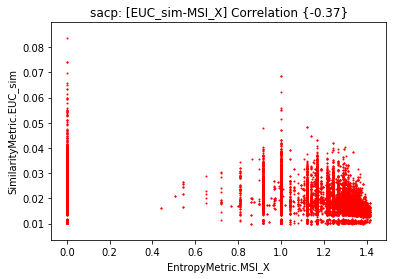

In [ ]:
manifoldEntropy.minimum_shared_entropy(dist=SimilarityMetric.EUC_sim, extropy=True)

### Mutual Information and Distance

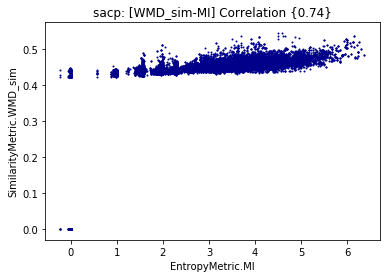

In [ ]:
manifoldEntropy.manifold_entropy_plot(manifold = EntropyMetric.MI, dist = SimilarityMetric.WMD_sim)

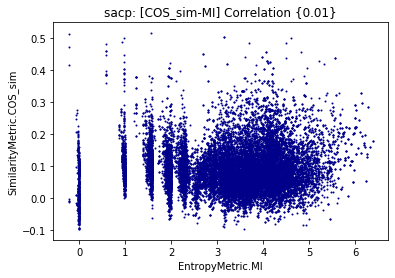

In [ ]:
manifoldEntropy.manifold_entropy_plot(manifold = EntropyMetric.MI, dist = SimilarityMetric.COS_sim)

### Loss Information and Distance

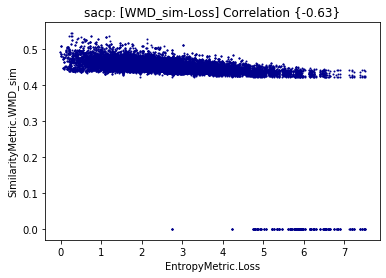

In [ ]:
manifoldEntropy.manifold_entropy_plot(manifold = EntropyMetric.Loss, dist = SimilarityMetric.WMD_sim)

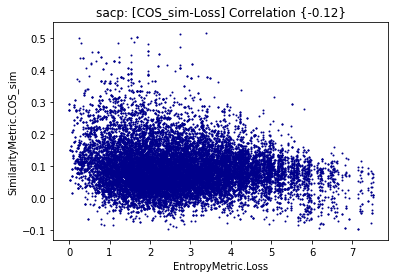

In [ ]:
manifoldEntropy.manifold_entropy_plot(manifold = EntropyMetric.Loss, dist = SimilarityMetric.COS_sim)

### Noise Information and Distance

In [ ]:
manifoldEntropy.manifold_entropy_plot(manifold = EntropyMetric.Noise, dist = SimilarityMetric.WMD_sim)

In [ ]:
manifoldEntropy.manifold_entropy_plot(manifold = EntropyMetric.Noise, dist = SimilarityMetric.COS_sim)

### Self-Information

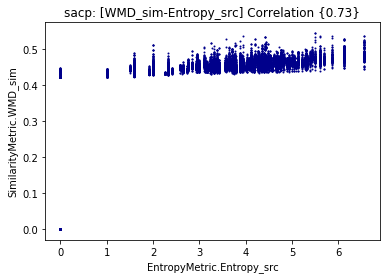

In [ ]:
manifoldEntropy.manifold_entropy_plot(manifold = EntropyMetric.Entropy_src, dist = SimilarityMetric.WMD_sim)

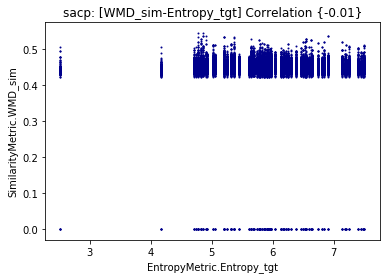

In [ ]:
manifoldEntropy.manifold_entropy_plot(manifold = EntropyMetric.Entropy_tgt, dist = SimilarityMetric.WMD_sim)

## Composable Manifolds

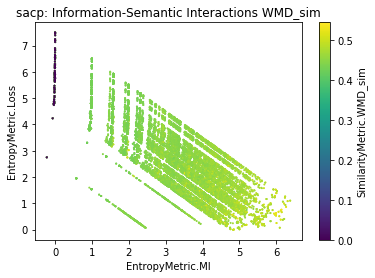

In [ ]:
manifoldEntropy.composable_entropy_plot(
                        manifold_x = EntropyMetric.MI,
                        manifold_y = EntropyMetric.Loss,
                        dist = SimilarityMetric.WMD_sim )

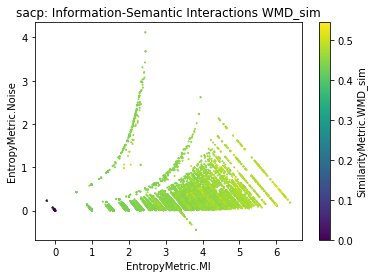

In [ ]:
manifoldEntropy.composable_entropy_plot(
                        manifold_x = EntropyMetric.MI,
                        manifold_y = EntropyMetric.Noise,
                        dist = SimilarityMetric.WMD_sim )

### Grouping Mutual information & Similarity Thru Noise

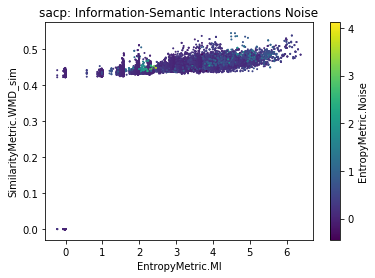

In [ ]:
manifoldEntropy.composable_entropy_plot(
                        manifold_x = EntropyMetric.MI,
                        manifold_y = SimilarityMetric.WMD_sim,
                        dist = EntropyMetric.Noise )

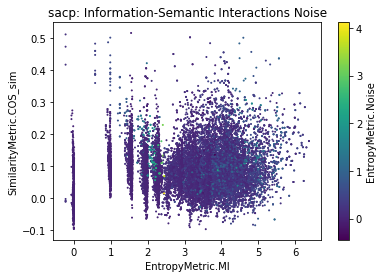

In [ ]:
manifoldEntropy.composable_entropy_plot(
                        manifold_x = EntropyMetric.MI,
                        manifold_y = SimilarityMetric.COS_sim,
                        dist = EntropyMetric.Noise )

### Grouping Mutual information & Similarity Thru Loss

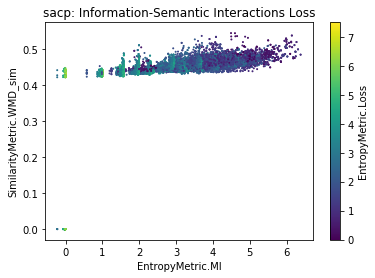

In [ ]:
manifoldEntropy.composable_entropy_plot(
                        manifold_x = EntropyMetric.MI,
                        manifold_y = SimilarityMetric.WMD_sim,
                        dist = EntropyMetric.Loss )

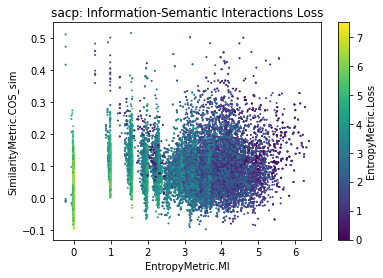

In [ ]:
manifoldEntropy.composable_entropy_plot(
                        manifold_x = EntropyMetric.MI,
                        manifold_y = SimilarityMetric.COS_sim,
                        dist = EntropyMetric.Loss )

In [ ]:
###Deprecated code down!

In [ ]:
filter_metrics_linked = filter_metrics_01[filter_metrics_01['Linked?'] == 1].copy()
filter_metrics_nonlinked = filter_metrics_01[filter_metrics_01['Linked?'] == 0].copy()


In [ ]:
x2 = filter_metrics_01[filter_metrics_01['Linked?'] == 1].plot.scatter(
    x=EntropyMetric.MSI_I,
    y=SimilarityMetric.SCM_sim, 
    c='Red',
    s=1,
    title = 'Liked SCM-Entropy Correlation {%.2f}' % compute_spearman_corr(filter_metrics_linked)
)
#x2.text(0,0,'test')

In [ ]:
#Separated by ground truth Links!
fig, ax = plt.subplots()
filter_metrics_01[filter_metrics_01['Linked?'] == 1].plot.scatter(
    x = EntropyMetric.MSI_I,
    y = EntropyMetric.MSI_X,
    c = SimilarityMetric.SCM_sim,
    #figsize = [12, 6],
    title = 'Information-Semantic Interactions SCM Linked',
    colormap = 'viridis',
    ax = ax,
    s=1
)
ax.set_xlabel("Minimum Shared Entropy")
ax.set_ylabel("Minimum Shared Extropy")

In [ ]:
#Separated by ground truth NonLinked!
fig, ax = plt.subplots()
filter_metrics_01[filter_metrics_01['Linked?'] == 0].plot.scatter(
    x = EntropyMetric.MSI_I,
    y = EntropyMetric.MSI_X,
    c = SimilarityMetric.SCM_sim,
    #figsize = [6, 5],
    title = 'Information-Semantic Interactions SCM non-Linked',
    colormap = 'viridis',
    ax = ax,
    s=1
)

ax.set_xlabel("Minimum Shared Entropy")
ax.set_ylabel("Minimum Shared Extropy")

### Deployment

In [ ]:
! nbdev_build_docs #<-------- [Activate when stable]

In [ ]:
! nbdev_build_lib

In [ ]:
from nbdev.export import notebook2script
notebook2script()

In [ ]:
#! pip install -e .